In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
## Maize Data set!

In [2]:
df = pd.read_csv('/content/drive/MyDrive/crops_dataset/updated_crop_prices/new_maize.csv')

In [3]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,07-04-2015
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,06-04-2015
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,21-03-2015
3,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1400.0,1300.0,20-03-2015
4,Kurnool,Allagadda,Maize,Other,FAQ,950.0,1100.0,1000.0,11-12-2014
...,...,...,...,...,...,...,...,...,...
1051576,Dehradoon,Vikasnagar,Maize,Other,FAQ,1870.0,2200.0,2000.0,03-03-2022
1051577,Dehradoon,Vikasnagar,Maize,Other,FAQ,1870.0,2200.0,2000.0,01-03-2022
1051578,Dehradoon,Vikasnagar,Maize,Other,FAQ,2000.0,2000.0,2000.0,31-01-2022
1051579,Dehradoon,Vikasnagar,Maize,Other,FAQ,1900.0,1900.0,1900.0,05-01-2022


# Pre-processing

In [4]:
df.shape

(1051581, 9)

In [5]:
rows = df.shape[0]
rows

1051581

In [6]:
cols = df.shape[1]
cols

9

In [7]:
df.isna().any()

District Name                False
Market Name                  False
Commodity                    False
Variety                      False
Grade                        False
Min Price (Rs./Quintal)      False
Max Price (Rs./Quintal)      False
Modal Price (Rs./Quintal)    False
Price Date                   False
dtype: bool

## Dealing with Null Values!

In [8]:
# Number of Null values in the entire dataframe
df.isna().sum().sum()

0

In [9]:
## Checking number of null values in all the columns!

column_names = list(df.columns)
for i in range(0, len(column_names)):
  print(f"Column No: {i+1} = {column_names[i]} has {df[column_names[i]].isna().sum()} Null values!")

Column No: 1 = District Name has 0 Null values!
Column No: 2 = Market Name has 0 Null values!
Column No: 3 = Commodity has 0 Null values!
Column No: 4 = Variety has 0 Null values!
Column No: 5 = Grade has 0 Null values!
Column No: 6 = Min Price (Rs./Quintal) has 0 Null values!
Column No: 7 = Max Price (Rs./Quintal) has 0 Null values!
Column No: 8 = Modal Price (Rs./Quintal) has 0 Null values!
Column No: 9 = Price Date has 0 Null values!


In [10]:
# No of unique values in all the columns

for i in range(0, len(column_names)):
  print(f'The column {column_names[i]} has {df[column_names[i]].nunique()} unique values!')

The column District Name has 408 unique values!
The column Market Name has 1570 unique values!
The column Commodity has 1 unique values!
The column Variety has 35 unique values!
The column Grade has 4 unique values!
The column Min Price (Rs./Quintal) has 3082 unique values!
The column Max Price (Rs./Quintal) has 3522 unique values!
The column Modal Price (Rs./Quintal) has 3283 unique values!
The column Price Date has 5813 unique values!


In [11]:
df.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
       'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [12]:
import pandas as pd

# Assuming df is your DataFrame
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Alternatively, you can use the following code to replace spaces with underscores and convert to lowercase
# df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Now, the column names will be in lowercase and with underscores instead of spaces
print(df.columns)


Index(['district_name', 'market_name', 'commodity', 'variety', 'grade',
       'min_price_(rs./quintal)', 'max_price_(rs./quintal)',
       'modal_price_(rs./quintal)', 'price_date'],
      dtype='object')


In [13]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,07-04-2015
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,06-04-2015
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,21-03-2015
3,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1400.0,1300.0,20-03-2015
4,Kurnool,Allagadda,Maize,Other,FAQ,950.0,1100.0,1000.0,11-12-2014


### dealing with modal_price if its having value as 0

In [14]:
df['modal_price_(rs./quintal)'].dtype

dtype('float64')

In [15]:


zero_count = df['modal_price_(rs./quintal)'].value_counts().get(0, 0)
print(f"Number of rows with modal_price_(rs./quintal) as 0: {zero_count}")


Number of rows with modal_price_(rs./quintal) as 0: 3358


In [16]:
import numpy as np

# Define a function to calculate the average price for each row
def calculate_average(row):
    if row['modal_price_(rs./quintal)'] == 0:
        return (row['min_price_(rs./quintal)'] + row['max_price_(rs./quintal)']) / 2
    else:
        return row['modal_price_(rs./quintal)']

# Apply the function to calculate the average price for each row
df['modal_price_(rs./quintal)'] = df.apply(calculate_average, axis=1)


In [17]:
zero_count = df['modal_price_(rs./quintal)'].value_counts().get(0, 0)
print(f"Number of rows with modal_price_(rs./quintal) as 0: {zero_count}")

Number of rows with modal_price_(rs./quintal) as 0: 0


In [18]:
df['month'] = df['price_date'].str[3:5].astype(int)
df['year'] = df['price_date'].str[6:].astype(int)


In [19]:
df.head(3)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,07-04-2015,4,2015
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,06-04-2015,4,2015
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,21-03-2015,3,2015


In [20]:
df['price_date'].dtype


dtype('O')

In [21]:
# Convert 'price_date' to timestamp
df['price_date'] = pd.to_datetime(df['price_date'], format='%d-%m-%Y')

# Convert 'month' and 'year' to int
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# Display the updated DataFrame
print(df.dtypes)

district_name                        object
market_name                          object
commodity                            object
variety                              object
grade                                object
min_price_(rs./quintal)             float64
max_price_(rs./quintal)             float64
modal_price_(rs./quintal)           float64
price_date                   datetime64[ns]
month                                 int64
year                                  int64
dtype: object


In [22]:
df_copy = df

# Encoding Columns

## district Name

In [23]:
df['district_name'].nunique()

408

In [24]:
value_counts = df['district_name'].value_counts()

In [25]:
value_counts

Nashik            24915
Sabarkantha       23355
Karimnagar        23281
Chittorgarh       20682
Jalgaon           18758
                  ...  
Sonipat               1
Jalaun (Orai)         1
Thane                 1
Kandhamal             1
Jorhat                1
Name: district_name, Length: 408, dtype: int64

In [26]:
district_name_frequency = df['district_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['district_name_encoded'] = df['district_name'].map(district_name_frequency)

In [27]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,4,2015,14303
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,4,2015,14303
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,3,2015,14303
3,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,3,2015,14303
4,Kurnool,Allagadda,Maize,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,12,2014,14303


## market name

In [28]:
df['market_name'].nunique()

1570

In [29]:
value_counts = df['market_name'].value_counts()

In [30]:
value_counts

Dahod                    9619
Vadodara                 7811
Fatehnagar               7422
Rajasamand               6058
Bhilwara                 4990
                         ... 
Kunigal                     1
Vadodara(Sayajipura)        1
Khariar Road                1
Umarked(Danki)              1
Tanakpur                    1
Name: market_name, Length: 1570, dtype: int64

In [31]:
market_name_frequency = df['market_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['market_name_encoded'] = df['market_name'].map(market_name_frequency)

In [32]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded
0,Kurnool,Allagadda,Maize,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,4,2015,14303,8
1,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,4,2015,14303,8
2,Kurnool,Allagadda,Maize,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,3,2015,14303,8
3,Kurnool,Allagadda,Maize,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,3,2015,14303,8
4,Kurnool,Allagadda,Maize,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,12,2014,14303,8


In [33]:
df = df.drop('commodity',axis=1)

## variety

In [34]:
df['variety'].nunique()

35

In [35]:
value_counts = df['variety'].value_counts()

In [36]:
variety_frequency = df['variety'].value_counts(normalize=False)

# Create a new column with encoded values
df['variety_encoded'] = df['variety'].map(variety_frequency)

In [37]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded,variety_encoded
0,Kurnool,Allagadda,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,4,2015,14303,8,125594
1,Kurnool,Allagadda,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,4,2015,14303,8,125594
2,Kurnool,Allagadda,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,3,2015,14303,8,125594
3,Kurnool,Allagadda,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,3,2015,14303,8,125594
4,Kurnool,Allagadda,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,12,2014,14303,8,418139


## grade

In [38]:
df['grade'].unique()

array(['FAQ ', 'Medium ', 'Large ', 'Small '], dtype=object)

In [39]:
value_counts = df['grade'].value_counts()
value_counts

FAQ        967049
Medium      78369
Large        4875
Small        1288
Name: grade, dtype: int64

In [40]:
grade_frequency = df['grade'].value_counts(normalize=False)

# Create a new column with encoded values
df['grade_encoded'] = df['grade'].map(grade_frequency)

In [41]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Kurnool,Allagadda,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,4,2015,14303,8,125594,967049
1,Kurnool,Allagadda,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,4,2015,14303,8,125594,967049
2,Kurnool,Allagadda,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,3,2015,14303,8,125594,967049
3,Kurnool,Allagadda,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,3,2015,14303,8,125594,967049
4,Kurnool,Allagadda,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,12,2014,14303,8,418139,967049


# Taking only the Encoded columns

In [42]:
df_encoded = df[['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'month', 'year', 'price_date', 'min_price_(rs./quintal)', 'max_price_(rs./quintal)', 'modal_price_(rs./quintal)']]


# Encoded Dataset

In [43]:
df_encoded.head(8)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,14303,8,125594,967049,4,2015,2015-04-07,1270.0,1400.0,1350.0
1,14303,8,125594,967049,4,2015,2015-04-06,1200.0,1350.0,1250.0
2,14303,8,125594,967049,3,2015,2015-03-21,1100.0,1350.0,1250.0
3,14303,8,125594,967049,3,2015,2015-03-20,1200.0,1400.0,1300.0
4,14303,8,418139,967049,12,2014,2014-12-11,950.0,1100.0,1000.0
5,14303,8,43135,967049,4,2009,2009-04-05,900.0,1100.0,1050.0
6,14303,8,43135,967049,4,2009,2009-04-04,1000.0,1200.0,1050.0
7,14303,8,43135,967049,8,2008,2008-08-11,760.0,1050.0,950.0


# Heat Map

<ipython-input-79-bd8ac08f063e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)


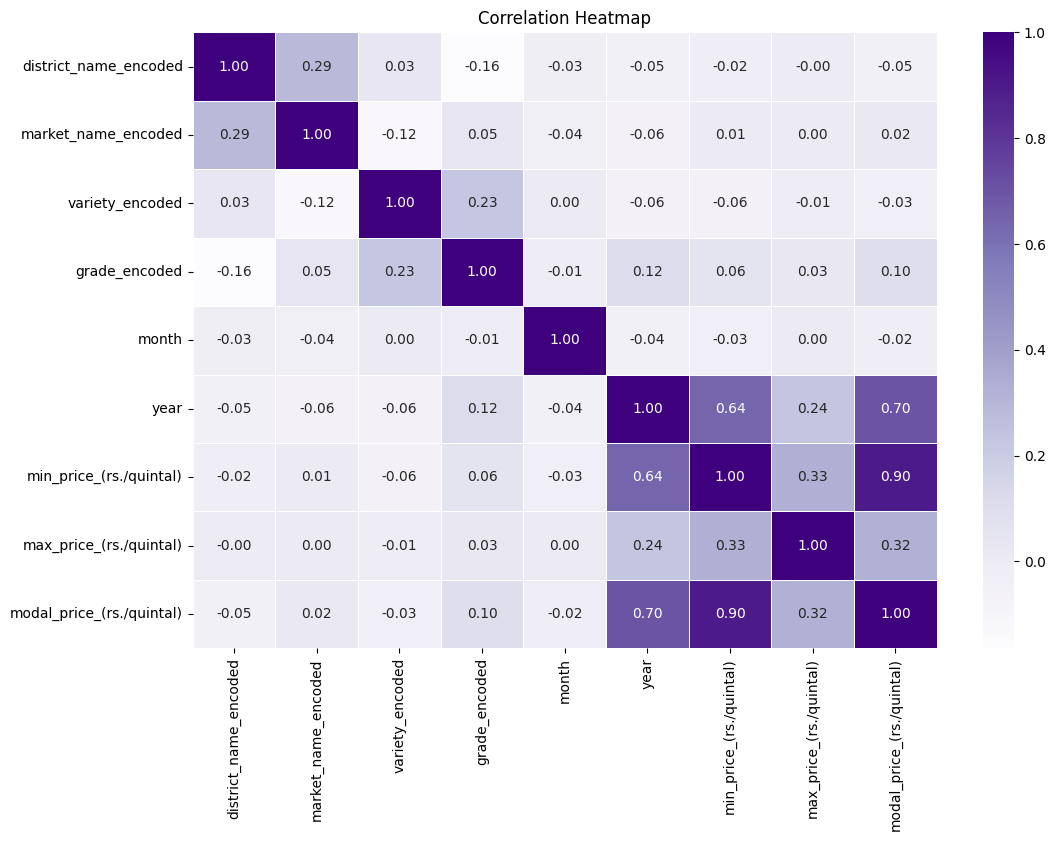

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='Purples', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Models and Evaluation

In [ ]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [ ]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,14303,8,125594,967049,4,2015,2015-04-07,1270.0,1400.0,1350.0
1,14303,8,125594,967049,4,2015,2015-04-06,1200.0,1350.0,1250.0
2,14303,8,125594,967049,3,2015,2015-03-21,1100.0,1350.0,1250.0
3,14303,8,125594,967049,3,2015,2015-03-20,1200.0,1400.0,1300.0
4,14303,8,418139,967049,12,2014,2014-12-11,950.0,1100.0,1000.0


In [ ]:
df_encoded['grade_encoded'].unique()

array([967049,  78369,   4875,   1288])

# Outlier Removing rows

In [ ]:

import pandas as pd
from scipy.stats import zscore

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
    outliers = (abs(z_scores) > threshold).any(axis=1)
    return outliers

# Identify outliers
outliers = identify_outliers_zscore(df_encoded)

# Remove rows with outliers
df_cleaned = df_encoded[~outliers]

In [ ]:
df_encoded = df_cleaned

In [ ]:
df_encoded['grade_encoded'].nunique()

1

## Standardizing values (min-max scalar)

In [ ]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,14303,8,125594,967049,4,2015,2015-04-07,1270.0,1400.0,1350.0
1,14303,8,125594,967049,4,2015,2015-04-06,1200.0,1350.0,1250.0
2,14303,8,125594,967049,3,2015,2015-03-21,1100.0,1350.0,1250.0
3,14303,8,125594,967049,3,2015,2015-03-20,1200.0,1400.0,1300.0
4,14303,8,418139,967049,12,2014,2014-12-11,950.0,1100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...
1051576,737,713,418139,967049,3,2022,2022-03-03,1870.0,2200.0,2000.0
1051577,737,713,418139,967049,3,2022,2022-03-01,1870.0,2200.0,2000.0
1051578,737,713,418139,967049,1,2022,2022-01-31,2000.0,2000.0,2000.0
1051579,737,713,418139,967049,1,2022,2022-01-05,1900.0,1900.0,1900.0


In [ ]:
# Columns to be scaled
columns_to_scale = ['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded']

# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])


# Standard Scaling
"""
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_encoded[columns_to_scale] = standard_scaler.fit_transform(df_encoded[columns_to_scale])
"""


# Robust Scaling
"""
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df_encoded[columns_to_scale] = robust_scaler.fit_transform(df_encoded[columns_to_scale])
"""

# Power Transformer
"""
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method='yeo-johnson')
df_encoded[columns_to_scale] = power_transformer.fit_transform(df_encoded[columns_to_scale])
"""

# Quantile Transformer - uniform
"""
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='uniform')
df_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])
"""

# Quantile Transformer - normal
"""
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')
df_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])
"""

"\nfrom sklearn.preprocessing import QuantileTransformer\n\nquantile_transformer = QuantileTransformer(output_distribution='normal')\ndf_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])\n"

In [ ]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.574055,0.001156,0.300361,0.0,4,2015,2015-04-07,1270.0,1400.0,1350.0
1,0.574055,0.001156,0.300361,0.0,4,2015,2015-04-06,1200.0,1350.0,1250.0
2,0.574055,0.001156,0.300361,0.0,3,2015,2015-03-21,1100.0,1350.0,1250.0
3,0.574055,0.001156,0.300361,0.0,3,2015,2015-03-20,1200.0,1400.0,1300.0
4,0.574055,0.001156,1.000000,0.0,12,2014,2014-12-11,950.0,1100.0,1000.0


In [ ]:
df_encoded['grade_encoded'].nunique()

1

## Forward Stepwise Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def forward_stepwise_selection(X, y):
    # Initialize an empty set of features
    selected_features = []

    # Initialize a linear regression model
    model = LinearRegression()

    # Loop until all features have been added to the model
    while len(selected_features) < X.shape[1]:

        # Initialize variables to keep track of best feature and score
        best_feature = None
        best_score = -np.inf

        # Loop over all remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Fit a model with the current set of features plus the new feature
                current_features = selected_features + [feature]
                X_current = X[current_features]
                model.fit(X_current, y)

                # Calculate the score for the new model
                y_pred = model.predict(X_current)
                score = r2_score(y, y_pred)

                # Keep track of the best feature and score
                if score > best_score:
                    best_feature = feature
                    best_score = score

        # Add the best feature to the selected features and print the result
        selected_features.append(best_feature)
        print(f'Selected feature: {best_feature}, Score: {best_score:.4f}')

    return selected_features


In [ ]:
X = df_encoded.loc[:, ['district_name_encoded',	'market_name_encoded',	'variety_encoded',	'grade_encoded',	'month',	'year']]
y = df_encoded.loc[:, ['min_price_(rs./quintal)',	'max_price_(rs./quintal)',	'modal_price_(rs./quintal)']]

In [ ]:
print(forward_stepwise_selection(X, y))

Selected feature: year, Score: 0.5502
Selected feature: market_name_encoded, Score: 0.5531
Selected feature: month, Score: 0.5536
Selected feature: district_name_encoded, Score: 0.5539
Selected feature: variety_encoded, Score: 0.5543
Selected feature: grade_encoded, Score: 0.5543
['year', 'market_name_encoded', 'month', 'district_name_encoded', 'variety_encoded', 'grade_encoded']


### All the features are closely important

In [ ]:
X.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year
0,0.574055,0.001156,0.300361,0.0,4,2015
1,0.574055,0.001156,0.300361,0.0,4,2015
2,0.574055,0.001156,0.300361,0.0,3,2015
3,0.574055,0.001156,0.300361,0.0,3,2015
4,0.574055,0.001156,1.000000,0.0,12,2014


In [ ]:
y.head(5)

,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,1270.0,1400.0,1350.0
1,1200.0,1350.0,1250.0
2,1100.0,1350.0,1250.0
3,1200.0,1400.0,1300.0
4,950.0,1100.0,1000.0


## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lnregressor = LinearRegression()
lnregressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lnregressor.predict(X_test)
y_pred

array([[1483.61684727, 1662.39124567, 1567.20478129],
       [1548.11466957, 1685.62194809, 1634.88079686],
       [1700.66205374, 1878.73125139, 1832.52611306],
       ...,
       [1712.60018156, 1890.13761253, 1833.71626936],
       [1712.90566897, 1910.68971596, 1837.97593975],
       [ 747.42810917,  813.12473581,  858.25928657]])

In [ ]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 211.6258047167901
Root Mean Square error is: 299.3701151971853
R2 score is: 0.5555676592703657


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [ ]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 55.01405066824274
Root Mean Square error is: 110.12645140065626
R2 score is: 0.9400835785978156


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=250, random_state=42, bootstrap=True, max_depth=70)

# Train the model using the training sets
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test)

In [ ]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 54.56506502118129
Root Mean Square error is: 106.81004268334556
R2 score is: 0.9436474691195178


## XgBoost Regression

In [ ]:
from xgboost import XGBRegressor
# Create the XGBoost regression model
xg_regressor = XGBRegressor(n_estimators=250, learning_rate=0.29,random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xg_regressor.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 88.66399859514006
Root Mean Square error is: 138.3806281397367
R2 score is: 0.9053599310092192


## KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_regressor.predict(X_test)


# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 66.46159335503722
Root Mean Square error is: 130.37426612485154
R2 score is: 0.916101793547872


# Datasets of Maize

## Main

In [ ]:
df

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Kurnool,Allagadda,Local,FAQ,1270.0,1400.0,1350.0,2015-04-07,4,2015,14303,8,125594,967049
1,Kurnool,Allagadda,Local,FAQ,1200.0,1350.0,1250.0,2015-04-06,4,2015,14303,8,125594,967049
2,Kurnool,Allagadda,Local,FAQ,1100.0,1350.0,1250.0,2015-03-21,3,2015,14303,8,125594,967049
3,Kurnool,Allagadda,Local,FAQ,1200.0,1400.0,1300.0,2015-03-20,3,2015,14303,8,125594,967049
4,Kurnool,Allagadda,Other,FAQ,950.0,1100.0,1000.0,2014-12-11,12,2014,14303,8,418139,967049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051576,Dehradoon,Vikasnagar,Other,FAQ,1870.0,2200.0,2000.0,2022-03-03,3,2022,737,713,418139,967049
1051577,Dehradoon,Vikasnagar,Other,FAQ,1870.0,2200.0,2000.0,2022-03-01,3,2022,737,713,418139,967049
1051578,Dehradoon,Vikasnagar,Other,FAQ,2000.0,2000.0,2000.0,2022-01-31,1,2022,737,713,418139,967049
1051579,Dehradoon,Vikasnagar,Other,FAQ,1900.0,1900.0,1900.0,2022-01-05,1,2022,737,713,418139,967049


### Saving the dataframe of mazie

> Indented block



In [ ]:
df.to_csv('newmdf.csv')

## Encoded

In [ ]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.574055,0.001156,0.300361,0.0,4,2015,2015-04-07,1270.0,1400.0,1350.0
1,0.574055,0.001156,0.300361,0.0,4,2015,2015-04-06,1200.0,1350.0,1250.0
2,0.574055,0.001156,0.300361,0.0,3,2015,2015-03-21,1100.0,1350.0,1250.0
3,0.574055,0.001156,0.300361,0.0,3,2015,2015-03-20,1200.0,1400.0,1300.0
4,0.574055,0.001156,1.000000,0.0,12,2014,2014-12-11,950.0,1100.0,1000.0
...,...,...,...,...,...,...,...,...,...,...
1051576,0.029542,0.117550,1.000000,0.0,3,2022,2022-03-03,1870.0,2200.0,2000.0
1051577,0.029542,0.117550,1.000000,0.0,3,2022,2022-03-01,1870.0,2200.0,2000.0
1051578,0.029542,0.117550,1.000000,0.0,1,2022,2022-01-31,2000.0,2000.0,2000.0
1051579,0.029542,0.117550,1.000000,0.0,1,2022,2022-01-05,1900.0,1900.0,1900.0


### Saving the encoded dataframe of maize

In [ ]:
df_encoded.to_csv('newmencdf.csv')

# Saving the Best Model

In [ ]:
"""
import pickle

# Pickle the model
with open('rf_regressor.pkl', 'wb') as f:
    pickle.dump(rf_regressor, f)
"""

"\nimport pickle\n\n# Pickle the model\nwith open('rf_regressor.pkl', 'wb') as f:\n    pickle.dump(rf_regressor, f)\n"